cloned from [Comprehending-K-Means-and-KNN-Algorithms](https://github.com/VenkateshUV/Comprehending-K-Means-and-KNN-Algorithms) by VenkateshUV

### K-Nearest Neighbors

In [36]:
#Importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [37]:
#Importing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [38]:
dataset.head()  

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
#Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [40]:
#Creating training and test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
#Performing Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
error

[0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.03333333333333333,
 0.1,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.13333333333333333,
 0.03333333333333333,
 0.1,
 0.06666666666666667,
 0.13333333333333333,
 0.06666666666666667,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.13333333333333333,
 0.1,
 0.13333333333333333,
 0.1,
 0.16666666666666666,
 0.13333333333333333,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.13333333333333333,
 0.13333333333333333,
 0.13333333333333333,
 0.16666666666666666]

Text(0, 0.5, 'Mean Error')

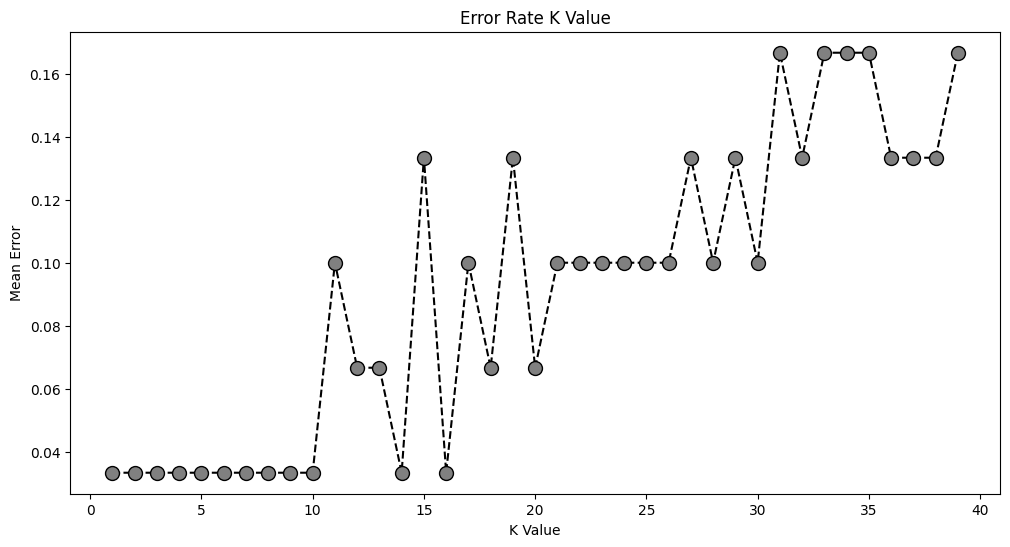

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [44]:

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = classifier.predict(X_test)

In [46]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 14  0]
 [ 0  1  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

